# Non-Linear Binary Classification

In this notebook we will build binary classification model using logistic regression technique. **Non-Linear** here refers to, where the data is separable by non-linear decision boundary.

## Outline

- [1 - Packages](#1)

- [2 - Dataset](#2)

- [3 - Non-Linear Binary Classification Model](#3)
    - [3.1 Scikit-Learn Model](#3point1)
    - [3.2 Numpy Model](#3point2)

<a id="1"></a>
## 1 - Packages

Below are the packages/libraries that we are going to use in this notebook.

In [ ]:
# Importing necessary packages/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from binary_classification_model import LogisticRegression_
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

<a id="2"></a>
## 2 - Dataset

The binary classification dataset that we are going to use is from [Kaggle](https://www.kaggle.com/datasets/l3llff/banana), which was provided by **L3LLFF**.

The dataset is downloaded and stored in `non_linear_binary_class_dataset` folder, the folder contains a CSV file named `banana_quality.csv` that we are going to use to train, validate, and test our model.

Let's load the dataset into pandas dataframe, and get the overview of it.

In [ ]:
# Loading the dataset into pandas dataframe
data = pd.read_csv("non_linear_binary_class_dataset/banana_quality.csv")
data

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


We have **8,000** rows and **8** columns, from which we are going to split the dataset into **60%** training, **20%** cross-validation, and **20%** testing sets. The first **7** columns are features variables and the last one is target variable.

While the dataset is clean, we will still going to look for any missing/NaN values in a dataset, and view the class distribution of the target variable. We also going to convert the target variable values from **Good** and **Bad** to **1** and **0**.

In [ ]:
# Checking for any missing/NaN values
data.isna().any()

,0
Size,False
Weight,False
Sweetness,False
Softness,False
HarvestTime,False
Ripeness,False
Acidity,False
Quality,False


In [ ]:
# Viewing the class distribution in target variable
np.unique(data["Quality"], return_counts=True)

(array(['Bad', 'Good'], dtype=object), array([3994, 4006]))

The dataset has no missing values, and also not has imbalanced class distribution. Let's now convert the dataset into numpy arrays.

In [ ]:
# Converting the data into numpy arrays
X = data.to_numpy()[:, 0:7]
Y = np.where(data["Quality"] == "Good", 1, 0).reshape(-1, 1)

print(f"X.shape: {X.shape} & Y.shape: {Y.shape}")

X.shape: (8000, 7) & Y.shape: (8000, 1)


In [ ]:
# Splitting the dataset into training (60%) and temp (40%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)

# Splitting the temp data into cross-validation (50%) and test (50%)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

print(f"Training Set Size: {X_train.shape}")
print(f"Cross-Validation Set Size: {X_cv.shape}")
print(f"Test Set Size: {X_test.shape}")

Training Set Size: (4800, 7)
Cross-Validation Set Size: (1600, 7)
Test Set Size: (1600, 7)


<a id="3"></a>
## 3 - Non-Linear Binary Classifcation Model

<a id="3point1"></a>
### 3.1 Scikit-Learn Model

Since we do not know whether the data is suitable for our goal (_e.g. is the data separable by non-linear dicision boundary_), we will first build few models linear and non-linear's using scikit-learn, and after determining the optimal model hopefully the non-linear binary classification model, we will then build our custom model using numpy.

In [ ]:
# Dictionary to store trained models with their polynomial degree as the key
models = {}

# Training models of (Degrees 1 to 6) -> (Degree 1 means linear model)
for degree in range(1, 7):
    print(f"Training model with polynomial degree {degree}")

    # Creating a pipeline with PolynomialFeatures + StandardScaler + SGDClassifier
    model_pipeline = Pipeline(
        steps=[
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("sgd_classifier", SGDClassifier(loss="log_loss", max_iter=10000, penalty=None, random_state=42)),
        ]
    )

    # Training the model
    model_pipeline.fit(X_train, Y_train.flatten())

    # Evaluating on training and cross-validation sets
    train_accuracy = accuracy_score(Y_train, model_pipeline.predict(X_train).reshape(-1, 1))
    cv_accuracy = accuracy_score(Y_cv, model_pipeline.predict(X_cv).reshape(-1, 1))

    print(f"Train Accuracy: {train_accuracy:.4f}, Cross-Validation Accuracy: {cv_accuracy:.4f}\n")

    # Storing the trained model with the polynomial degree as the key
    models[f"degree_{degree}"] = model_pipeline

Training model with polynomial degree 1
Train Accuracy: 0.8781, Cross-Validation Accuracy: 0.8850

Training model with polynomial degree 2
Train Accuracy: 0.9640, Cross-Validation Accuracy: 0.9650

Training model with polynomial degree 3
Train Accuracy: 0.9829, Cross-Validation Accuracy: 0.9675

Training model with polynomial degree 4
Train Accuracy: 0.9877, Cross-Validation Accuracy: 0.9694

Training model with polynomial degree 5
Train Accuracy: 0.9875, Cross-Validation Accuracy: 0.9637

Training model with polynomial degree 6
Train Accuracy: 0.9865, Cross-Validation Accuracy: 0.9681



The results indicate that the dataset is **not linearly separable**, as higher-degree models improve performance.  

- **Degree 1** performs poorly (**Train: 87.81%**, **CV: 88.50%**), proving a linear model is insufficient.  
- **Degree 2** achieves **strong and stable accuracy (Train: 96.40%, CV: 96.50%)**, showing it captures necessary non-linearity.  
- **Degree 3-6** improve train accuracy but **CV accuracy stabilizes or slightly drops**, suggesting overfitting.  

Thus, the **degree 2 model** is the best choice, offering **high efficiency, stability, and accuracy**. And it proves that the dataset is suitable for our goal.

Now let's evaluate the optimal model on testing set.

In [ ]:
# Retrieving the optimal model
model = models["degree_2"]
model

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('sgd_classifier',
                 SGDClassifier(loss='log_loss', max_iter=10000, penalty=None,
                               random_state=42))])

In [12]:
# Making prediction on test data and calculating the accuracy
test_accuracy = accuracy_score(Y_test, model.predict(X_test).reshape(-1, 1))
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9550


The test accuracy is close to train and validation accuracy. This completes our goal of building a non-linear binary classification model using scikit-learn library.

<a id="3point2"></a>
### 3.2 Numpy Model

Now we will build non-linear binary classification model using numpy library. We will use vectorized approach for efficient implementation.

The non-linear binary classification model also called logistic regression can be represented as:

$$ Z = f(X) = X \cdot W + B \tag{1} $$  
$$ \hat{Y} = \sigma(Z) = \frac{1}{1 + e^{-Z}} \tag{2} $$  

where,  
- $Z$ is the linear combination of input features, weights, and bias.  
- $X$ is the input feature matrix.  
- $W$ is the weight matrix.  
- $B$ is the bias matrix.
- $\hat{Y}$ is the predicted probability matrix.
- $\sigma(Z)$ is the sigmoid activation function whose input is $Z$.  

The cost function for our model will be **Binary Cross-Entropy (Log Loss)**:

$$ C = J(W, B) = -\frac{1}{m} * \sum \left[Y * \ln(\hat{Y}) + (1 - Y) * \ln(1 - \hat{Y}) \right] \tag{3} $$

where,  
- $m$ is the number of training examples.  
- $Y$ is the actual target variable matrix.  

To train our model, we will use **gradient descent**, updating weights and bias as follows:

$$ W = W - \alpha * \frac{\partial J(W, B)}{\partial W} \tag{4} $$
$$ B = B - \alpha * \frac{\partial J(W, B)}{\partial B} \tag{5} $$

where,  
$$ \frac{\partial J(W, B)}{\partial W}  = \frac{1}{m} * X^{T} \cdot (\hat{Y} - Y) \tag{6} $$  
$$ \frac{\partial J(W, B)}{\partial B}  = \frac{1}{m} * \sum (\hat{Y} - Y) \tag{7} $$  

_**NOTE:** All the code implementation of the above is in `binary_classification_model.py` file_.

In [22]:
# Initializing the numpy model and training it for 1000 iterations
numpy_model = LogisticRegression_(iterations=1000, alpha=5, degree=2)
numpy_model.fit(X_train, Y_train)

Iteration: 1/1000
Cost: 0.6931471803599453

Iteration: 2/1000
Cost: 0.19588484481261173

Iteration: 3/1000
Cost: 0.15927233707365807

Iteration: 4/1000
Cost: 0.14802217725214087

Iteration: 5/1000
Cost: 0.1410438484040771

Iteration: 6/1000
Cost: 0.13602652674613763

Iteration: 7/1000
Cost: 0.13222232726269745

Iteration: 8/1000
Cost: 0.12925931737222077

Iteration: 9/1000
Cost: 0.12690709102140832

Iteration: 10/1000
Cost: 0.12500663750981136

Iteration: 11/1000
Cost: 0.12344338651814221

Iteration: 12/1000
Cost: 0.1221340019989874

Iteration: 13/1000
Cost: 0.1210180040130337

Iteration: 14/1000
Cost: 0.12005160540138429

Iteration: 15/1000
Cost: 0.1192030409786031

Iteration: 16/1000
Cost: 0.11844909641745495

Iteration: 17/1000
Cost: 0.11777259890691218

Iteration: 18/1000
Cost: 0.11716064284234447

Iteration: 19/1000
Cost: 0.11660335277716899

Iteration: 20/1000
Cost: 0.11609302658550646

Iteration: 21/1000
Cost: 0.11562354213399535

Iteration: 22/1000
Cost: 0.11518994444915241

It

Text(0, 0.5, 'Cost')

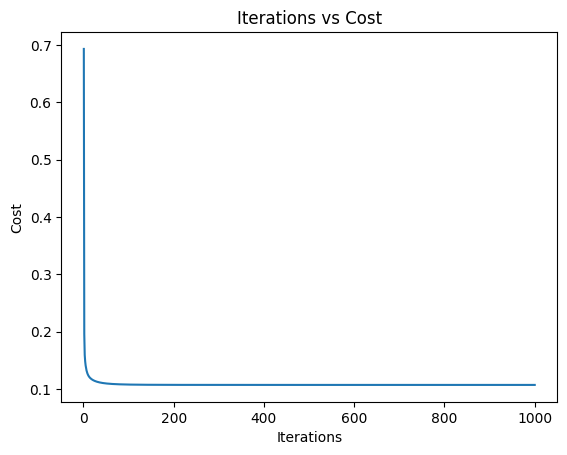

In [23]:
# Plotting the training history of the model
history = np.array(numpy_model.history)

plt.plot(history[:, 0], history[:, 1])
plt.title("Iterations vs Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

As we can see in the above plot that cost has been minimized, thus resulting in optimal parameters for the model. Now we are ready to make prediction. We will make prediction on all sets and compare the results with scikit-learn model.

In [24]:
# Making prediction on all sets and calculating the accuracy
train_accuracy_ = accuracy_score(Y_train, (numpy_model.make_prediction(X_train) >= 0.5).astype(int))
cv_accuracy_ = accuracy_score(Y_cv, (numpy_model.make_prediction(X_cv) >= 0.5).astype(int))
test_accuracy_ = accuracy_score(Y_test, (numpy_model.make_prediction(X_test) >= 0.5).astype(int))

print(f"Train Accuracy: {train_accuracy_:.4f}"),
print(f"Cross-Validation Accuracy: {cv_accuracy_:.4f}")
print(f"Test Accuracy: {test_accuracy_:.4f}")

Train Accuracy: 0.9663
Cross-Validation Accuracy: 0.9706
Test Accuracy: 0.9550


The train and cross-validation accuracy of numpy model is slightly better than scikit-learn model, but for the test set the accuracy is same, thus marking the completion of building non-linear binary classification model using numpy library.